## Global Electronics

# JOURNEY TO THE DASHBOARD

The Data has been Cleaned and Wrangled to one single table for Analysis. Also there is going to be a Univariate,Bivariate and Multivariate Analysis that will be done on the Data after wards The conclusion and Summary of the database will be drawn.Lastly, the whole data will be Visualized.

# Obtaining The tools

In [1]:
# Firstly we import our Wrangled Data
import pandas as pd
Data=pd.read_excel('Sales Summary(1).xlsx')
Customer=pd.read_excel('Customers.xlsx')
Product=pd.read_excel('Products.xlsx')
#Data
# Import Tools Needed for the Job
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
#warnings.filterwarnings('ignore')

In [2]:
# A Cell to View Data
Data
import warnings
warnings.filterwarnings('ignore')
Data.dtypes
#pd.get_dummies(Data)
Data.sort_values('Name')
Data

,Customer_Key,Product_Key,Category_Key,Name,Gender,Country,Continent,Order_Date,Product_Name,Brand,Category,Unit_Cost_USD,Unit_Price_USD,Quantity,Birthday
0,301,53,1,Lilly Harding,Female,Australia,Australia,2019-11-11,WWI 4GB Video Recording Pen X200 Black,Wide World Importers,Audio,98.07,296.00,2,1939-07-03
1,325,443,3,Madison Hull,Female,Australia,Australia,2018-01-13,WWI Desktop PC3.0 M0300 Silver,Wide World Importers,Computers,160.49,349.00,4,1979-09-27
2,325,656,3,Madison Hull,Female,Australia,Australia,2018-01-13,"Proseware Desk Jet All-in-One Printer, Scanner...",Proseware,Computers,72.66,158.00,4,1979-09-27
3,325,1084,4,Madison Hull,Female,Australia,Australia,2018-01-13,Contoso SLR Camera X143 Grey,Contoso,Cameras and camcorders,214.03,646.00,3,1979-09-27
4,325,418,3,Madison Hull,Female,Australia,Australia,2019-11-16,Adventure Works Desktop PC1.60 ED160 Silver,Adventure Works,Computers,137.63,269.95,3,1979-09-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62879,2099937,425,3,Zygmunt Kaminski,Male,United States,North America,2018-06-22,Adventure Works Desktop PC1.80 ED180 Black,Adventure Works,Computers,188.13,369.00,5,1965-08-18
62880,2099937,344,3,Zygmunt Kaminski,Male,United States,North America,2018-06-22,Fabrikam Laptop12 M2000 White,Fabrikam,Computers,186.60,366.00,7,1965-08-18
62881,2099937,1162,4,Zygmunt Kaminski,Male,United States,North America,2018-06-22,Fabrikam Business Videographer 1/3'' 8.5mm M38...,Fabrikam,Cameras and camcorders,395.48,860.00,1,1965-08-18
62882,2099937,434,3,Zygmunt Kaminski,Male,United States,North America,2020-02-15,Adventure Works Desktop PC2.30 MD230 White,Adventure Works,Computers,275.46,599.00,10,1965-08-18


# Adding Of Columns

In [3]:

# COMPUTE TO OBTAIN SALES,COSTS AND PROFIT
Data['Sales']=Data['Unit_Price_USD']*Data['Quantity']
Data['Costs']=Data['Unit_Cost_USD']*Data['Quantity']
Data['Profit_per_Sales']=Data['Sales']-Data['Costs']
Data['Months']=Data['Order_Date'].apply(lambda x:x.strftime('%B'))
Data['Years']=Data['Order_Date'].apply(lambda x:x.strftime('%Y')).astype(int)
#Data['Continent'].value_counts()
Data['Age']=(Data['Years'].max())-(Data['Birthday'].apply(lambda x:x.strftime('%Y')).astype(int))

# Grouping Tables by Columns to break down Complexity of Data and obtain a Concise Distribution

In [4]:
#Let's Group the Brands bought by Gender
Data.pivot_table(index='Brand',
                 columns='Gender',
                 values='Customer_Key',
                 aggfunc='count')


Gender,Female,Male
Brand,,
A. Datum,938,896
Adventure Works,3148,3234
Contoso,7928,8025
Fabrikam,1763,1797
Litware,822,841
Northwind Traders,1176,1235
Proseware,1479,1516
Southridge Video,3908,3979
Tailspin Toys,2667,2790


In [5]:
# Group Brand by Category
Data.pivot_table(index='Brand',
                 columns='Category',
                 values='Product_Key',
                 aggfunc='count',
                margins=True,
                 margins_name='Total')




Category,Audio,Cameras and camcorders,Cell phones,Computers,Games and Toys,Home Appliances,"Music, Movies and Audio Books",TV and Video,Total
Brand,,,,,,,,,
A. Datum,NaN,1834.0,NaN,NaN,NaN,NaN,NaN,NaN,1834
Adventure Works,NaN,NaN,NaN,4267.0,NaN,320.0,NaN,1795.0,6382
Contoso,1052.0,1837.0,4096.0,1642.0,NaN,2475.0,4621.0,230.0,15953
Fabrikam,NaN,1888.0,NaN,491.0,NaN,1181.0,NaN,NaN,3560
Litware,NaN,NaN,NaN,NaN,NaN,1461.0,NaN,202.0,1663
Northwind Traders,2315.0,NaN,NaN,NaN,NaN,96.0,NaN,NaN,2411
Proseware,NaN,NaN,NaN,2768.0,NaN,227.0,NaN,NaN,2995
Southridge Video,NaN,NaN,NaN,404.0,1604.0,NaN,4548.0,1331.0,7887
Tailspin Toys,NaN,NaN,NaN,NaN,5457.0,NaN,NaN,NaN,5457


In [10]:
# financial Analysis
pv=H_Data.pivot_table(index='Brand',
                 values=['Sales','Profit_per_Sales'],
                 aggfunc='sum',
                 margins=True,
                margins_name='Total')
pv.sort_values(by=['Profit_per_Sales','Sales'],ascending=[0,0])


,Profit_per_Sales,Sales
Brand,,
Total,32662688.38,55755479.59
Contoso,7880520.85,13492352.53
Wide World Importers,4531764.26,7721438.26
Adventure Works,4321387.82,7360744.35
Southridge Video,3894807.21,6620231.44
The Phone Company,2502870.42,4332879.24
Fabrikam,2402117.02,4082773.53
Tailspin Toys,2028114.80,3472723.78
Proseware,1482601.57,2521275.95


In [ ]:
# Gender Preference and spending
Data.pivot_table(index='Gender',
                 values=['Sales','Profit_per_Sales'],
                 aggfunc='sum',
                 margins=True,
                margins_name='Total')


In [ ]:
Data.pivot_table(columns='Gender',
                 values='Product_Key',
                 aggfunc='count',
                 margins=True,
                 margins_name='Total Products')


In [ ]:
# Show the list of Customers. I wanted to use a conditional statement but a poivot table covered that.
Customer_Summary1=Data.pivot_table(index=['Name','Product_Name'],
                                   columns=['Gender'],
                 values='Profit_per_Sales',
                 aggfunc='sum',
                 margins=True,
                 margins_name='Total')
Data.loc[Data['Name']=='??nore Beausoleil']
#Customer_Summary['Name'].count()


In [ ]:
# i am having Problem counting the no of Customers
Customer_Summary2=Data.pivot_table(index=['Name','Product_Name'],
                                   #columns='Gender',
                                   values='Sales',
                                   aggfunc='sum')
Customer_Summary2

                                   
            

In [ ]:
#(Data.drop_duplicates(['Name','Country','Continent','Brand','Profit_per_Sales','Sales','Gender','Months','Years','Age'])
    #.assign(col=Data.groupby(['Name','Sales','Profit_per_Sales'])#.cum_counts()+1)
    #.set_index(['Name','Sales','Profit_per_Sales','col'])
    #['Country','Continent','Brand','Gender','Months','Years','Age'].unstack().add_prefix('Country','Continent','Brand','Gender','Months','Years','Age')
    #.reset_index()
    #       )
#)

In [11]:
H_Data=pd.DataFrame(Data.groupby(['Name'], as_index=False).agg({'Gender':'first','Country':'first','Continent':'first','Brand':'first','Sales':'sum','Profit_per_Sales':'sum','Age':'first','Order_Date':'first','Months':'first','Years':'first'})                   
                                         )
#H_Data['Gender'].astype(str)
H_Data['Country']=H_Data['Country'].str.replace('North America','United States')
H_Data.to_excel('Squeezed Sales Summary.xlsx',index=False)
H_Data

,Name,Gender,Country,Continent,Brand,Sales,Profit_per_Sales,Age,Order_Date,Months,Years
0,??nore Beausoleil,Female,France,Europe,Contoso,417.39,211.94,66,2019-06-22,June,2019
1,??nore Fluet,Female,France,Europe,The Phone Company,5470.48,3536.52,62,2018-08-17,August,2018
2,??nore Soucy,Female,France,Europe,Tailspin Toys,19.96,9.80,63,2020-10-14,October,2020
3,?atha Barbosa,Female,United States,North America,Contoso,8113.34,4417.89,82,2017-10-03,October,2017
4,?atha Cavalcanti,Female,United States,North America,Contoso,1019.70,550.77,72,2018-05-17,May,2018
...,...,...,...,...,...,...,...,...,...,...,...
11777,Zosja Steffens,Female,Netherlands,Europe,Fabrikam,10228.97,6205.19,35,2016-07-12,July,2016
11778,Zrina Ilic,Female,United States,North America,The Phone Company,1033.76,638.67,84,2016-12-24,December,2016
11779,Zrina Topic,Female,United States,North America,Contoso,42788.04,26008.23,60,2016-08-13,August,2016
11780,Zurie Ruel,Female,United States,North America,Wide World Importers,4584.84,2466.87,35,2021-01-26,January,2021


In [ ]:
#THE COUNTY AND CONTINENT SUMMARY TOO!! I ALMOST FORGOT!!
coun_Data=H_Data.pivot_table(index=['Country'],
                 
                 values='Sales',
                 aggfunc='sum',)
coun_Data.sort_values(by=['Sales'], ascending=[0])
coun_Data.plot(kind='line',linewidth=3,marker='o',markersize=10,c='black')
plt.rcParams.keys;
plt.xticks(rotation=45);

In [ ]:
count_Data=H_Data.pivot_table(index=['Continent'],
                 
                 values='Sales',
                 aggfunc='sum',)
count_Data.sort_values(by=['Sales'], ascending=[0])
count_Data.plot(kind='bar',linewidth=7)

In [ ]:
countr_Data=H_Data.groupby('Country').agg({'Sales':'sum'})
countr_Data.plot(kind='line',linewidth=3,color='black',marker='o',markersize=10);
plt.xticks(rotation=45);
plt.rcParams['axes.edgecolor']='white'

In [ ]:
country_Data=H_Data.pivot_table(index=['Continent','Country'],
                 
                 values='Sales',
                 aggfunc='sum',)
count_Data.sort_values(by=['Continent','Sales'], ascending=[0,0])

# Conclusion from the Grouped Analysis

    Data presented is a 5 years record of Sales, Products, and Customers of Global Electronics.
    After the Financial Analysis it was drawn out that the'Contoso' Brand was sold largely in quantity and was the Higest brand that affected the Company's Profit, Also, 'Contoso' Brand was the highest in terms of profit and sales. The analysis announces that the company is running on a profit market of approximately 32.6 million dollars.
    The 'Contoso' Brand has a dominant effect in the market movement. Most of the Products purchased from Global Electronics was hosted by Contoso. Well, Also the ratio of male to female in this market is almost equal. let head to the hypothetical analysis.
    

# Hypothetical Analysis

# Here we will do customer segmentation using cluster and kmeans but first we hop into the Univariate and Bivariate Analysis

# Univariate analysis

In [ ]:
Data.describe
plt.figure(figsize=(10,8))
sns.distplot(H_Data['Age']);


In [ ]:
#h_Data=
plt.figure(figsize=(10,8))
plt.rcParams['patch.edgecolor']='white'
sns.kdeplot(data=H_Data,x='Profit_per_Sales',shade=True,hue='Gender',linewidth=5,multiple='stack');

In [ ]:
col=['Age','Sales','Profit_per_Sales']
for i in col:
    plt.figure(figsize=(8,6))
    plt.rcParams['patch.edgecolor']='white'
    sns.kdeplot(data=H_Data,x=i,shade=True,hue='Gender',linewidth=5,multiple='stack');
#plt.rcParams.keys()   

In [ ]:
col_Box=['Age','Sales','Profit_per_Sales']
for i in col_Box:
    plt.figure(figsize=(8,6))
    sns.boxplot(data=H_Data,y=i,x='Gender');

In [ ]:
H_Data['Gender'].value_counts(normalize=True)

During the univariate analysis, I had to do a kde plot, and a boxplot with the ages, Sales and Profit_per_Sales of the data. before I did that, I had to group the Data and remove the duplicates to have a clearer view of the Data I am analyzing. this first set of analysis is for the customers Sales analysis and want to compare and optimize the decision coming from this summary and the company sales analysis. the Sales and the profit market is postively skewd, this means that the market is distributed in such a way that the few people go for products with higher prices and more people go for product with lower prices. This is not the same for the age distribution. the age distribution says that the market is dominated by people within the age bracket of 20 to 80 years and they are distributed almost equally in the market in between this ages. Only that the age 20 is slightly higher.

# Bivariate Analysis 

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=H_Data,x='Age',y='Sales')

In [ ]:
plt.figure(figsize=(10,8))
sns.kdeplot(data=H_Data,x='Age',y='Sales',fill=True,multiple='stack',linewidth=10,hue='Gender')

In [ ]:
H_Data.groupby('Gender' ,as_index=False)[['Age','Sales','Profit_per_Sales']].mean()

In [ ]:
corr=H_Data[['Age','Sales','Profit_per_Sales']].corr()
corr

In [ ]:
sns.heatmap(corr,annot=True,cmap='coolwarm')

After, the Bivariate Analysis the sales distribution by age gave a seemingly transitional movement from very jam-packed set of section to a loose place. as obtained from the univariate analysis of sales I realized that people mostly buy  from the place that is cheaper and lesser people buy the expensive goods.

# Machine learning: KMeans Algorithm;Clusters(Univariate,Bivariate,Multivariate)

In [ ]:
Cluster=KMeans(n_clusters=3)

In [ ]:
Cluster.fit(H_Data[['Age']])

In [ ]:
Cluster.labels_

In [ ]:
H_Data['Age Cluster']=pd.DataFrame(Cluster.labels_)

In [ ]:
H_Data['Age Cluster'].value_counts()

In [ ]:
Cluster.inertia_

In [ ]:
in_score=[]
for i in range(1,11):
   Cluster1=KMeans(n_clusters=i)
   Cluster1.fit(H_Data[['Age']])
   Cluster1.inertia_
   in_score.append( Cluster1.inertia_)

plt.plot(range(1,11),in_score)
#H_Data['Sales Cluster']=Cluster1_labels_


In [ ]:
plt.figure(figsize=(8,6))
sns.kdeplot(data=H_Data,x='Age',shade=True,hue='Age Cluster',linewidth=5)#,multiple='stack');

In [ ]:
from sklearn.preprocessing import StandardScaler
scale= StandardScaler()
hh=pd.get_dummies(H_Data,dtype='int')
#[[hh.columns]]
#hh=hh[['Age','Sales','Profit_per-Sales']]
hh=H_Data[['Age','Sales']]
hh=pd.DataFrame(scale.fit_transform(hh))
hh
H_Data#=H_Data.drop('Sales Cluster', axis=1)

In [8]:
in_score2=[]
for i in range(1,11):
    Cluster2=KMeans(n_clusters=i)
    Cluster2.fit(H_Data[['Age','Sales']])
    Cluster2.inertia_
    in_score2.append(Cluster2.inertia_)

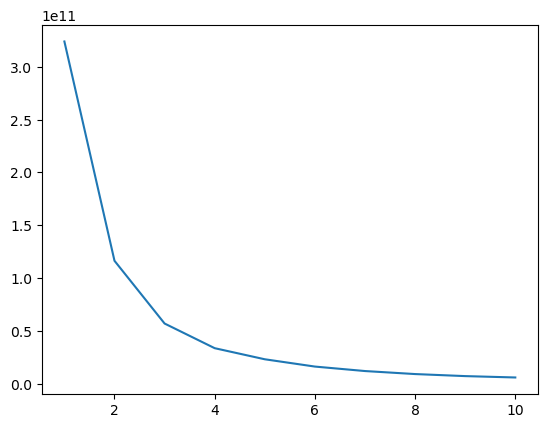

In [9]:
plt.plot(range(1,11),in_score2)

In [16]:
Cluster2=KMeans(n_clusters=3)
Cluster2.fit(H_Data[['Age','Sales']])

KMeans(n_clusters=3)

In [17]:
Cluster2.labels_

array([1, 0, 1, ..., 2, 1, 0])

In [18]:
H_Data['Age and Sales cluster']=pd.DataFrame(Cluster2.labels_)
center=pd.DataFrame(Cluster2.cluster_centers_)
center.columns=['x','y']

<Axes: xlabel='Age', ylabel='Sales'>

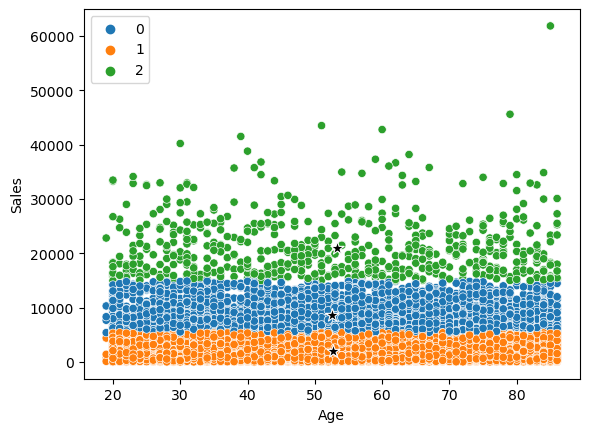

In [19]:
sns.scatterplot(data=H_Data,x='Age',y='Sales',hue='Age and Sales cluster',palette='tab10',alpha=1)
sns.scatterplot(data=center,x='x',y='y',s=100,c='black',marker='*')


In [ ]:
pd.crosstab(H_Data['Age and Sales cluster'],H_Data['Gender'],normalize='index')
pd.to_excel(

# SEGMENTATION SUMMARY

    Here, we did KMeans Algorithm to know the age clusters and Age Sales Cluster. From the age we got 3 clusters that stood out. This cluster created an automatic age bracket we will work with in our age distribution sales. at this point all three ages clusters are competing with themselves and no on fully stands out. 
    For the Age and sales cluster, the bivariate analysis on the Sales-Age transition from higher price to lower price. All the ages participated in this transition but for the higher products th gap closed a bit. we succesfully got clusters for this distribution. It shows the demarcation between this transitions and the mean point for each cluster. the first group exhausted at approx. $5000 then the second groyup took off from there and stopped at Approx. $15000 and the last group flew to $60000 but at this point the momentum for density began to exhaust drastically. thats where the plot closed. as the group in creased the lesser the amount of customers in the groups.
    The market basically obeyed the principle of Dem,and and Supply. this company is still afloat.